In [1]:
## Netflix Data Analysis Project

In [146]:
# Step 1: Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [148]:
# Load the dataset
netflix_df = pd.read_csv("netflix_titles.csv",encoding='utf-8')


In [150]:
netflix_df.shape

(8807, 12)

In [156]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [96]:
# netflix_df

print(netflix_df)

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [98]:
# Display the first few rows
print(netflix_df.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [158]:
pd.isnull(netflix_df).sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [160]:
netflix_df = netflix_df.drop(['description', 'show_id'], axis=1)

In [162]:
# Dropping duplicates
netflix_df.drop_duplicates(inplace=True)
#Handling Missing data
netflix_df.dropna(subset=["director", "cast", "date_added", "rating"], inplace=True)
netflix_df.fillna("Unknown", inplace=True)

In [11]:
pd.isnull(netflix_df).sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [12]:
#netflix_df["date_added"] = pd.to_datetime(df["date_added"], errors='coerce')
#netflix_df['date_added'] = netflix_df['date_added'].apply(lambda x: parser.parse(x).strftime('%y-%m-%d'))
#netflix_df['date_added'] = netflix_df['date_added'].dt.strftime('%Y-%m-%d')
netflix_df['date_added'] = netflix_df['date_added'].apply(lambda x: x.strftime('%Y-%m-%d') if isinstance(x, pd.Timestamp) else x)

In [164]:
netflix_df.shape

(5699, 10)

In [108]:
print(netflix_df)

         type                  title         director  \
0       Movie   Dick Johnson Is Dead  Kirsten Johnson   
1     TV Show          Blood & Water              NaN   
2     TV Show              Ganglands  Julien Leclercq   
3     TV Show  Jailbirds New Orleans              NaN   
4     TV Show           Kota Factory              NaN   
...       ...                    ...              ...   
8802    Movie                 Zodiac    David Fincher   
8803  TV Show            Zombie Dumb              NaN   
8804    Movie             Zombieland  Ruben Fleischer   
8805    Movie                   Zoom     Peter Hewitt   
8806    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                  

In [14]:
netflix_df.drop(columns=["description"], inplace=True)

In [15]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV"


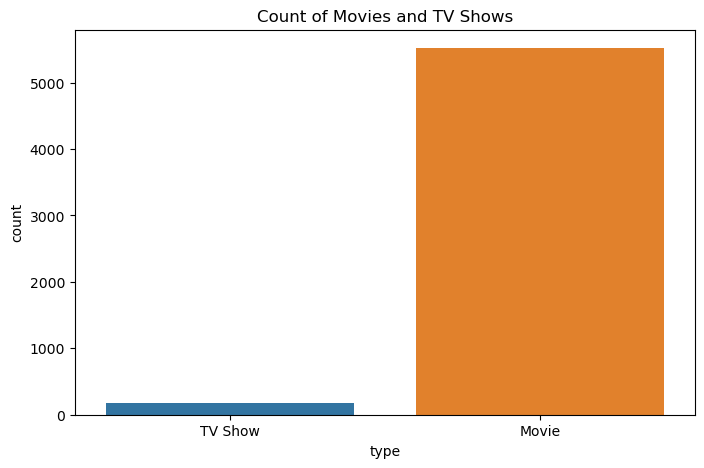

In [16]:
# Data Visualization
plt.figure(figsize=(8, 5))
sns.countplot(data=netflix_df, x='type', hue='type')
plt.title("Count of Movies and TV Shows")
plt.show()

In [17]:
##  1.Content Type Distribution:
print("Netflix has more Movies than TV Shows, indicating a preference for film content.")

Netflix has more Movies than TV Shows, indicating a preference for film content.


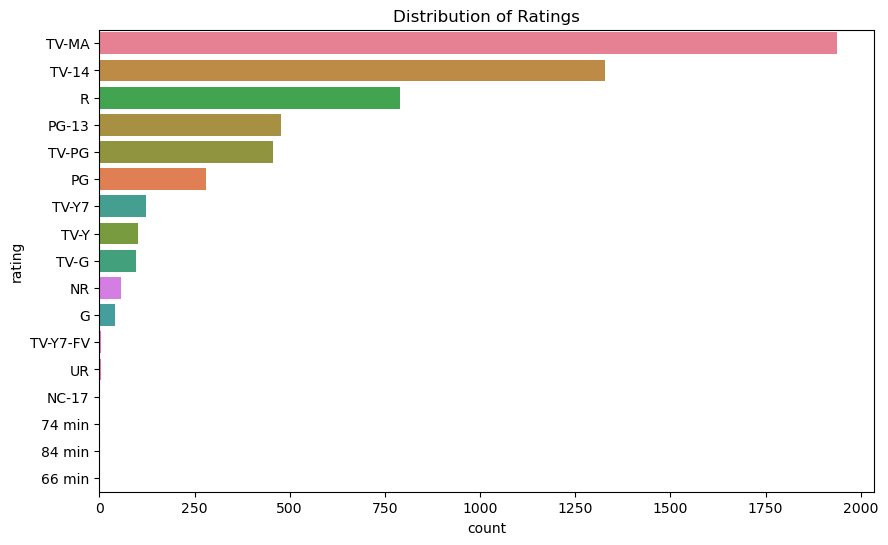

In [18]:
# Rating Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=netflix_df['rating'], order=netflix_df['rating'].value_counts().index, hue=netflix_df['rating'])
plt.title("Distribution of Ratings")
plt.show()

In [19]:
#insights
print("The most common rating category is TV-MA, meaning Netflix focuses on Mature Content.")

The most common rating category is TV-MA, meaning Netflix focuses on Mature Content.


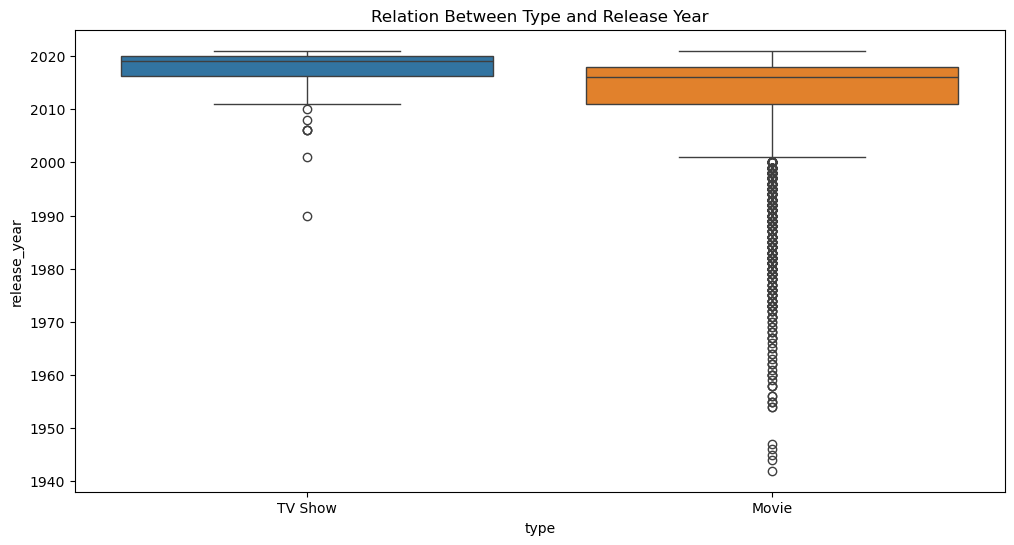

In [20]:
# Type vs Rating
plt.figure(figsize=(12, 6))
sns.boxplot(data=netflix_df, x='type', y='release_year', hue='type')
plt.title("Relation Between Type and Release Year")
plt.show()

In [21]:
#insights
print("The release year analysis shows that most content is from recent years.")

The release year analysis shows that most content is from recent years.


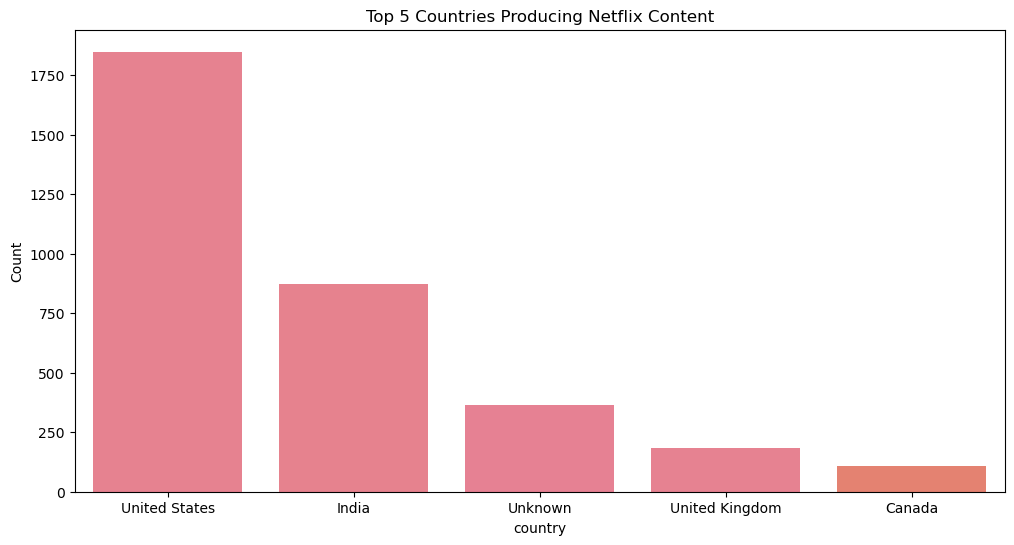

In [22]:

plt.figure(figsize=(12, 6))
sns.countplot(data=netflix_df, x='country', order=netflix_df['country'].value_counts().head().index ,hue=netflix_df['country'])
plt.title("Top 5 Countries Producing Netflix Content")
plt.ylabel("Count")
plt.show()

In [23]:
#Insights
print("- The United States and India dominating the Netflix content production.")

- The United States and India dominating the Netflix content production.


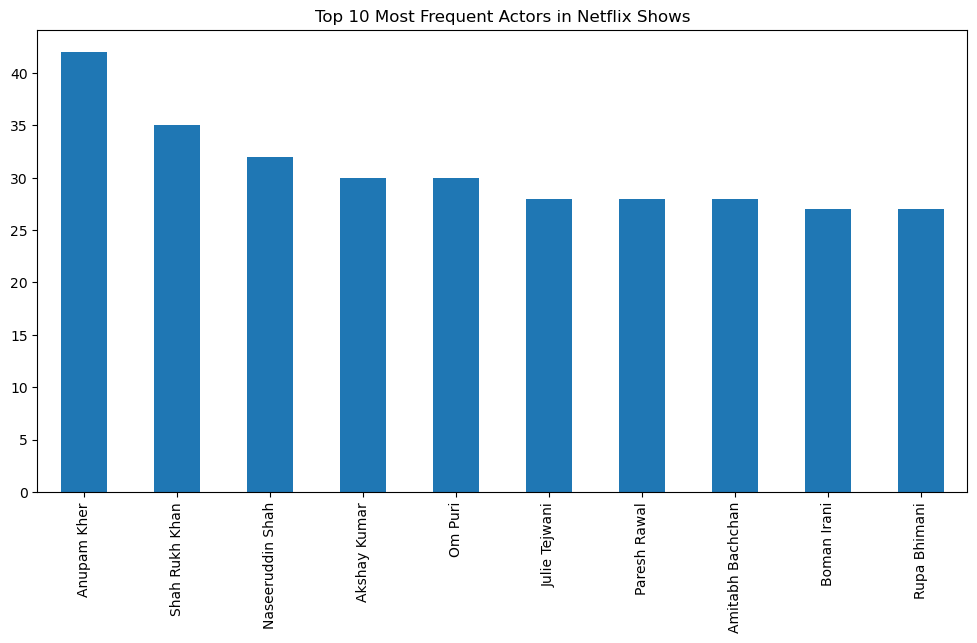

In [24]:
# Most frequent actors
plt.figure(figsize=(12, 6))
pd.Series(','.join(netflix_df['cast'].dropna()).split(',')).str.strip().value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Most Frequent Actors in Netflix Shows")
plt.show()

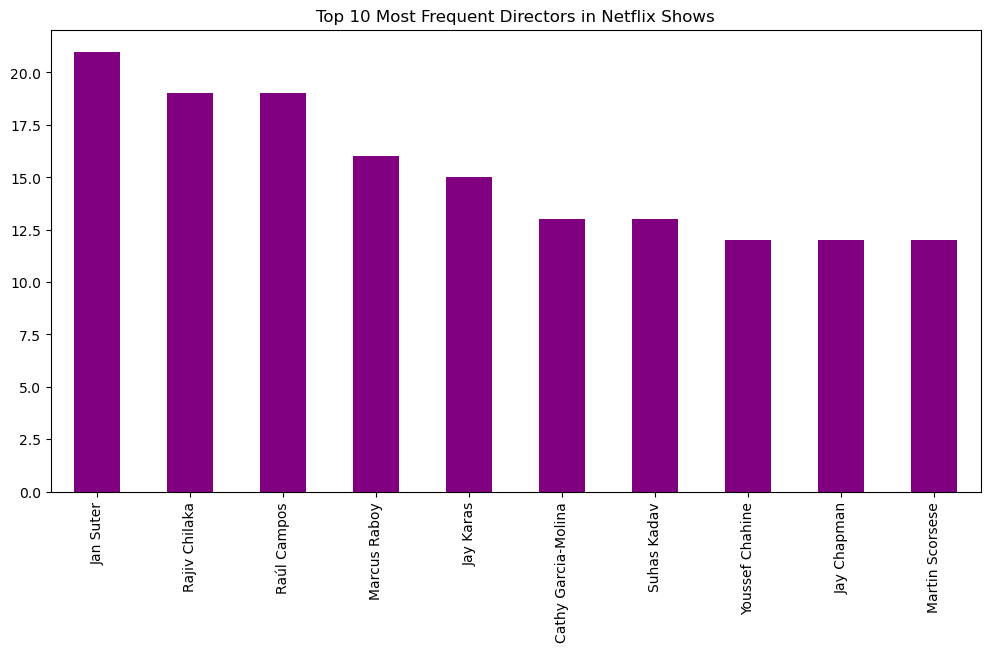

In [25]:
# Most frequent directors
plt.figure(figsize=(12, 6))
pd.Series(','.join(netflix_df['director'].dropna()).split(',')).str.strip().value_counts().head(10).plot(kind='bar', color='purple')
plt.title("Top 10 Most Frequent Directors in Netflix Shows")
plt.show()

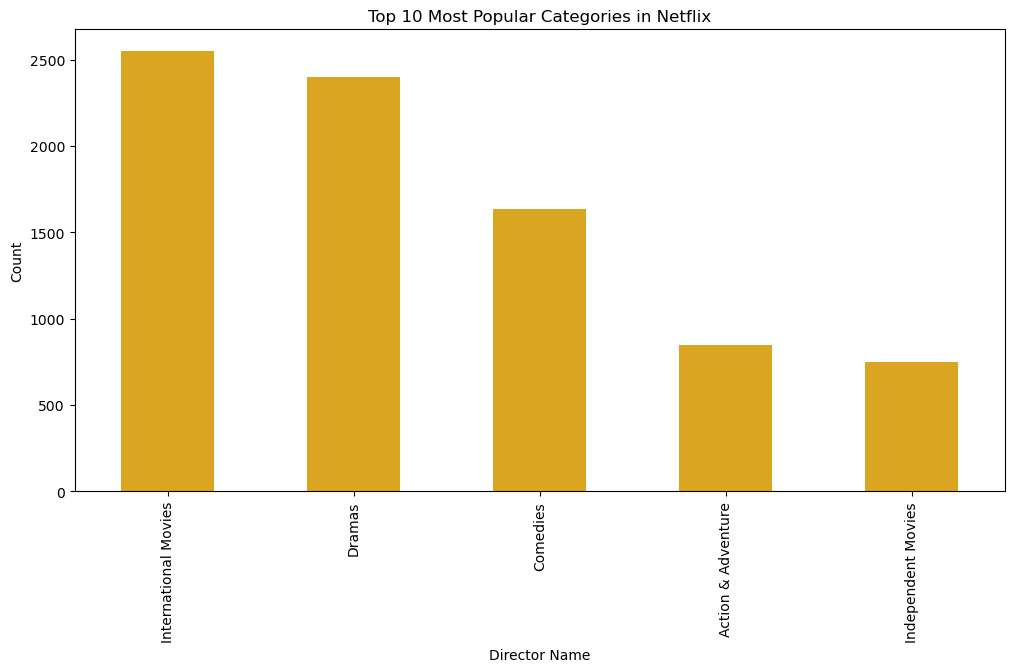

In [26]:
# Most popular categories
plt.figure(figsize=(12, 6))
pd.Series(','.join(netflix_df['listed_in'].dropna()).split(',')).str.strip().value_counts().head().plot(kind='bar', color='goldenrod')
plt.title("Top 10 Most Popular Categories in Netflix")
plt.ylabel("Count")
plt.xlabel("Director Name")
plt.show()


In [27]:
#Insights
print("- International Movies, Dramas and Comedies are most popular categories.")

- International Movies, Dramas and Comedies are most popular categories.


In [28]:
# Filters
content_type = input("Enter type (Movie/TV Show): ")
country_filter = input("Enter country (or leave blank): ")
if country_filter:
    filtered_df = netflix_df[(netflix_df['type'] == content_type) & (netflix_df['country'] == country_filter) ]
else:
    filtered_df = netflix_df[netflix_df['type'] == content_type]
print(filtered_df.head(3))


Enter type (Movie/TV Show):  TV Show
Enter country (or leave blank):  


  show_id     type                          title         director  \
2      s3  TV Show                      Ganglands  Julien Leclercq   
5      s6  TV Show                  Midnight Mass    Mike Flanagan   
8      s9  TV Show  The Great British Baking Show  Andy Devonshire   

                                                cast         country  \
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...         Unknown   
5  Kate Siegel, Zach Gilford, Hamish Linklater, H...         Unknown   
8  Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...  United Kingdom   

           date_added  release_year rating   duration  \
2  September 24, 2021          2021  TV-MA   1 Season   
5  September 24, 2021          2021  TV-MA   1 Season   
8  September 24, 2021          2021  TV-14  9 Seasons   

                                           listed_in  
2  Crime TV Shows, International TV Shows, TV Act...  
5                 TV Dramas, TV Horror, TV Mysteries  
8                       British TV S

In [29]:
# Conclusion
print("\nConclusion:")
print("Netflix's library is diverse, but the focus is on movies and mature-rated content.")
print("USA and India dominating  content production, but other countries also contributing significantly.")
print("Popular actors and directors indicate strong partnerships with Netflix.")



Conclusion:
Netflix's library is diverse, but the focus is on movies and mature-rated content.
USA and India dominating  content production, but other countries also contributing significantly.
Popular actors and directors indicate strong partnerships with Netflix.
